In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
from datetime import datetime, date
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import font_manager

import geopandas
import branca.colormap as cm
from branca.element import Template, MacroElement
import folium
from folium import plugins

In [2]:
# mac os
font_path = '/Library/Fonts/simhei.ttf'
fontP = font_manager.FontProperties(fname=font_path)
fontP.set_size(14)
fontP_12 = font_manager.FontProperties(fname=font_path)
fontP_12.set_size(12)

## Import datasets

In [3]:
tot_empl_province_df = pd.read_csv('datasets/按行业分城镇单位就业人员(万人)/城镇单位就业人员.csv',
                                   header=3, encoding='gb2312')
tot_empl_province_df = tot_empl_province_df[:31]
tot_empl_province_df = tot_empl_province_df.fillna(0)

In [4]:
tot_salary_province_df = pd.read_csv('datasets/按行业分城镇单位就业人员平均工资(元)/城镇单位就业人员平均工资.csv',
                                   header=3, encoding='gb2312')
tot_salary_province_df = tot_salary_province_df[:31]
tot_salary_province_df = tot_salary_province_df.fillna(0)

In [5]:
tot_chomageNb_province_df = pd.read_csv('datasets/城镇登记失业人数(万人).csv',
                                   header=3, encoding='gb2312')
tot_chomageNb_province_df = tot_chomageNb_province_df[:31]
tot_chomageNb_province_df = tot_chomageNb_province_df.fillna(0)

In [6]:
tot_chomagePct_province_df = pd.read_csv('datasets/城镇登记失业率(%).csv',
                                         header=3, encoding='gb2312')
tot_chomagePct_province_df = tot_chomagePct_province_df[:31]
tot_chomagePct_province_df = tot_chomagePct_province_df.fillna(0)

In [7]:
emplNb_province_df = pd.read_csv('datasets/empl_nb_final_per_province.csv')
salary_province_df = pd.read_csv('datasets/salary_final_per_province.csv')

## Visu tools

In [8]:
def thousands(x, pos):
    return '%1.0f' % (x * 1e-3)

def millions(x, pos):
    return '%1.0f' % (x * 1e-6)

formatter_thousands = FuncFormatter(thousands)
formatter_millions = FuncFormatter(millions)

## Employee amount

In [9]:
tot_empl_province_df = tot_empl_province_df.sort_values('2019年', ascending=False).reset_index(drop=True)

tot_empl_prov_top10_df = tot_empl_province_df.head(10).set_index('地区').T.iloc[::-1].reset_index()
tot_empl_prov_top10_df['index'] = tot_empl_prov_top10_df['index'].apply(lambda x: x.split('年')[0])
tot_empl_prov_top10_df = tot_empl_prov_top10_df.rename(columns = {'index':'year'})

/Users/jingwen/github/python-playground/_venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/jingwen/github/python-playground/_venv/lib/python3.9/site-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jingwen/github/python-playground/_venv/lib/python3.9/site-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


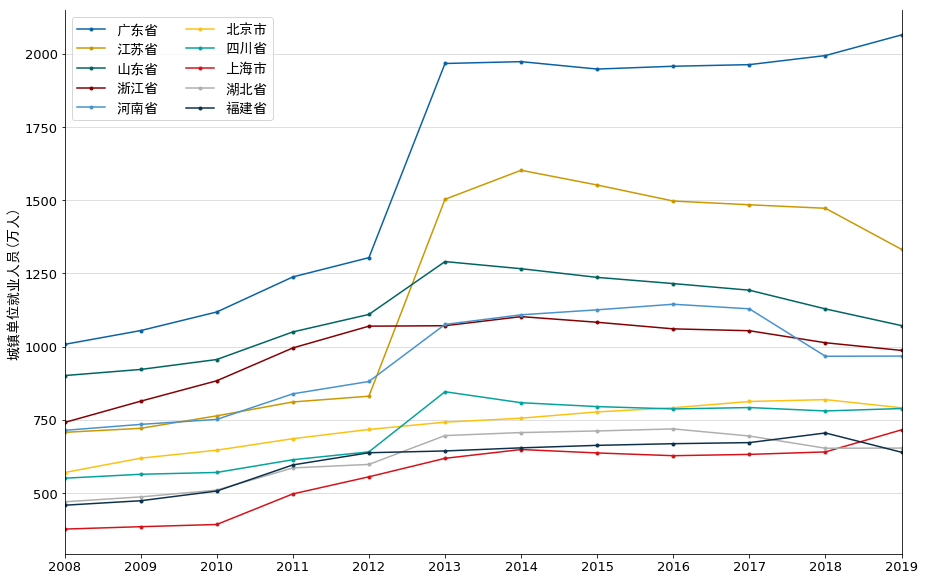

In [10]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
width = 5

line_gd, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['广东省'][7:-1],
                      color='#0A62A5',
                      linewidth=1.5,
                      marker='.'
                     )
line_js, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['江苏省'][7:-1],
                      color='#CC9801',
                      linewidth=1.5,
                      marker='.'
                     )
line_sd, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['山东省'][7:-1],
                      color='#006460',
                      linewidth=1.5,
                      marker='.'
                     )
line_zj, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['浙江省'][7:-1],
                      color='#850003',
                      linewidth=1.5,
                      marker='.'
                     )
line_hn, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['河南省'][7:-1],
                      color='#4893cd',
                      linewidth=1.5,
                      marker='.'
                     )
line_bj, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['北京市'][7:-1],
                      color='#fcc115',
                      linewidth=1.5,
                      marker='.'
                     )
line_sc, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['四川省'][7:-1],
                      color='#05a39d',
                      linewidth=1.5,
                      marker='.'
                     )
line_sh, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['上海市'][7:-1],
                      color='#d61218',
                      linewidth=1.5,
                      marker='.'
                     )
line_hb, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['湖北省'][7:-1],
                      color='#aeafae',
                      linewidth=1.5,
                      marker='.'
                     )
line_fj, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['福建省'][7:-1],
                      color='#0e314b',
                      linewidth=1.5,
                      marker='.'
                     )

axarr.tick_params(labelsize=13)
axarr.set_xlim(0, 11)
axarr.spines['top'].set_visible(False)
axarr.set_ylabel('城镇单位就业人员(万人)', size=13, fontproperties=fontP)

axarr.grid(which='major', axis='y', alpha=0.5)
axarr.legend(handles=(line_gd, line_js, line_sd, line_zj, line_hn, 
                      line_bj, line_sc, line_sh, line_hb, line_fj),
             labels=('广东省', '江苏省', '山东省', '浙江省', '河南省',
                     '北京市', '四川省', '上海市', '湖北省', '福建省'),
             ncol=2,
             loc=2, prop=fontP)


截止到2019年，就业人员数最多的十个省/直辖市为广东省、江苏省、山东省、浙江省、河南省、北京市、四川省、上海市、湖北省和福建省。其中，广东省、北京市和上海市的就业人数自2018年以来持续上涨，尤其是广东省，一直位居榜首。华南城市研究会会长、暨南大学教授胡刚分析，近年来珠三角产业转型升级加快，高端制造业、信息经济等新兴产业快速发展，吸引了大量就业人口。同时珠三角地区近年来放开放宽落户限制，也吸引了很多人落户。此外，江苏省重视高校毕业生的就业，有针对性地提供就业见习、职业指导、技能培训、就业援助等帮扶；同时深化东西部扶贫协作和对口支援，大力发展家庭服务业，促进扶贫对象就业增收、创业致富。此外，统筹做好农村劳动力转移就业、农民工返乡创业、退役军人就业和就业困难人员的就业帮扶。

关于北京市就业人口，2019年就业质量报告显示，清华北大本科毕业生留京率都不到2成，其中北京大学（校本部）为16.07%，清华大学为18.20%。这已经是清北毕业生留京率连续多年下跌了。2013年，北大本科生留京率曾高达71.79%，清华本科生留京率为30.7%。以清北为代表的名校生的就业去向，代表了当下大学生的就业倾向。反观南方的两座一线城市，广州和深圳对大学生态度更为“友好”。在2020年深圳人才引进政策下，全日制本科且未满45周岁以下直接核准入户，全日制大专且未满35周岁以下直接核准入户。2020年底，广州出台宽松的落户政策，一方面，“双一流”建设高校全日制本科及以上学历的青年人才，在引进单位参加社会保险即可入户，另一方面，个别区域大专也可以落户。当年同样控制人口的上海，落户政策也有了松动。继对清北两校毕业生抛出橄榄枝后，2020年上海对本地的上海交大、复旦、同济、华东师大4所985高校的毕业生也友善招手。与上广深相比，大学生在北京落户依旧很难。2017年北京在引进毕业生的工作中强调，要按照城市总体规划，严控北京禁限产业引进毕业生。

## Employee salary

In [11]:
tot_salary_province_19_df = tot_salary_province_df.sort_values('2019年', ascending=False).reset_index(drop=True)

tot_salary_prov_top10_df = tot_salary_province_19_df.head(10).set_index('地区').T.iloc[::-1].reset_index()
tot_salary_prov_top10_df['index'] = tot_salary_prov_top10_df['index'].apply(lambda x: x.split('年')[0])
tot_salary_prov_top10_df = tot_salary_prov_top10_df.rename(columns = {'index':'year'})

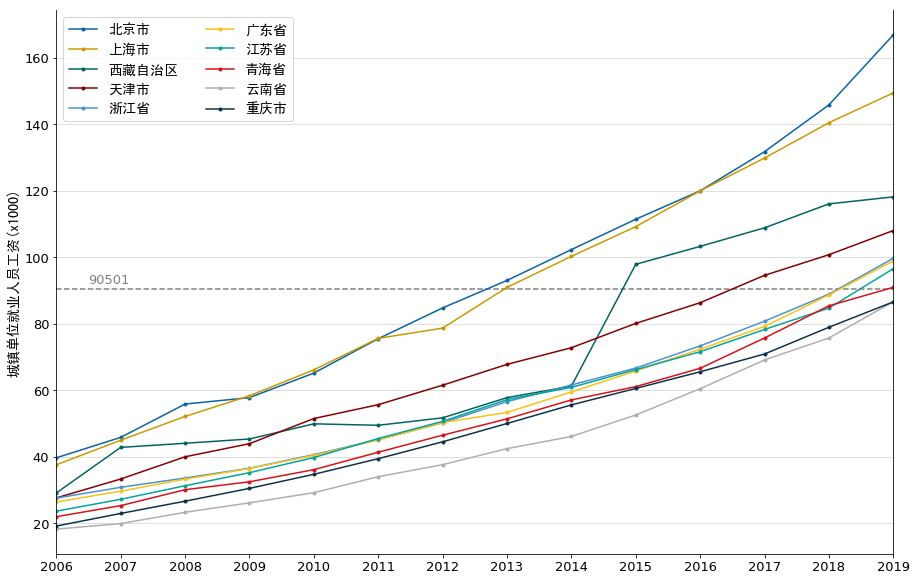

In [57]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
width = 5

line_bj, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['北京市'][5:-1],
                      color='#0A62A5',
                      linewidth=1.5,
                      marker='.'
                     )
line_sh, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['上海市'][5:-1],
                      color='#CC9801',
                      linewidth=1.5,
                      marker='.'
                     )
line_xz, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['西藏自治区'][5:-1],
                      color='#006460',
                      linewidth=1.5,
                      marker='.'
                     )
line_tj, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['天津市'][5:-1],
                      color='#850003',
                      linewidth=1.5,
                      marker='.'
                     )
line_zj, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['浙江省'][5:-1],
                      color='#4893cd',
                      linewidth=1.5,
                      marker='.'
                     )
line_gd, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['广东省'][5:-1],
                      color='#fcc115',
                      linewidth=1.5,
                      marker='.'
                     )
line_js, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['江苏省'][5:-1],
                      color='#05a39d',
                      linewidth=1.5,
                      marker='.'
                     )
line_qh, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['青海省'][5:-1],
                      color='#d61218',
                      linewidth=1.5,
                      marker='.'
                     )
line_yn, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['云南省'][5:-1],
                      color='#aeafae',
                      linewidth=1.5,
                      marker='.'
                     )
line_cq, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['重庆市'][5:-1],
                      color='#0e314b',
                      linewidth=1.5,
                      marker='.'
                     )
axarr.hlines(y=90501, xmin=0, xmax=13, linestyles='--', color='grey')
axarr.text(x=0.5, y=92000, s='90501', fontsize=13, color='grey')

axarr.tick_params(labelsize=13)
axarr.set_xlim(0, 13)
axarr.spines['top'].set_visible(False)
axarr.set_ylabel('城镇单位就业人员工资(x1000)', size=13, fontproperties=fontP)
axarr.yaxis.set_major_formatter(formatter_thousands)

axarr.grid(which='major', axis='y', alpha=0.5)
axarr.legend(handles=(line_bj, line_sh, line_xz, line_tj, line_zj, 
                      line_gd, line_js, line_qh, line_yn, line_cq),
             labels=('北京市', '上海市', '西藏自治区', '天津市', '浙江省',
                     '广东省', '江苏省', '青海省', '云南省', '重庆市'),
             ncol=2,
             loc=2, prop=fontP)




在大陆31个省/自治区/直辖市中，北京上海的平均工资一直居高不下。城镇非私营单位方面，全国仅有北京、上海、西藏自治区、天津、浙江、广东、江苏等7省市的年均工资超过90501元的平均线，即月均工资超过7541.75元。其中，北京不仅是全国平均工资最高的地区，而且也是目前唯一一个私营单位、非私营单位年均工资增幅双双加快的地区，领先优势非常突出。北京统计局数据显示，2019年全市城镇非私营单位年均工资166803元，名义增速为14.4%，较上年加快3.7个百分点；私营单位年均工资为85262元，名义增长10.9%，较上年加快2.2个百分点。

## Employee number and salary per domain for some provinces in 2019

### Beijing

In [13]:
emplNb_dom_bj_df = emplNb_province_df[
    emplNb_province_df['地区'] == '北京市'].sort_values('2019年').reset_index(drop=True)

domain_bj_19_df = emplNb_dom_bj_df.merge(
    salary_province_df[salary_province_df['地区'] == '北京市'][['地区', '行业', '2019年']],
    on=['地区', '行业'], suffixes=('_population', '_salary'))

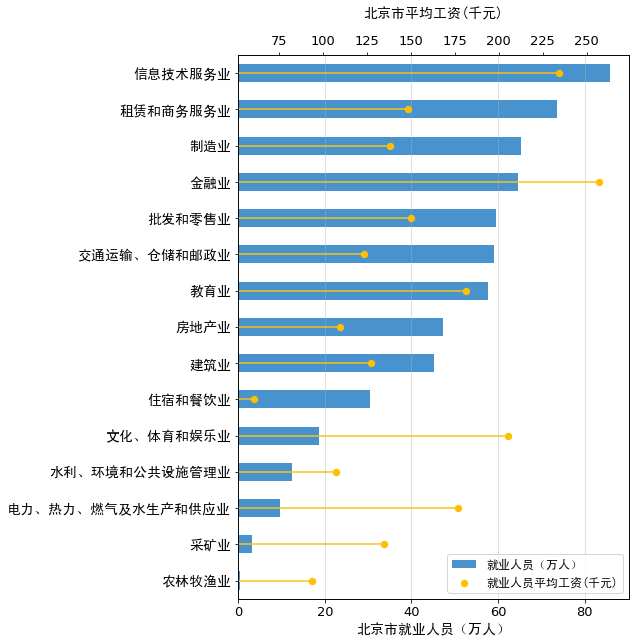

In [61]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(7, 10))
width = 0.5

barh1 = axarr.barh(np.arange(len(domain_bj_19_df)),
                   domain_bj_19_df['2019年_population'],
                   color='#4893cd', height=width)

axarr.tick_params(labelsize=13)
axarr.set_xlabel('北京市就业人员（万人）', size=13, fontproperties=fontP)
axarr.set_yticks(domain_bj_19_df.index)
axarr.set_yticklabels(domain_bj_19_df['行业'], fontproperties=fontP)
axarr.set_ylim(-0.5, 14.5)
axarr.grid(which='major', axis='x', alpha=0.5)

ax_02 = axarr.twiny()
ax_02.hlines(y=np.arange(len(domain_bj_19_df)),
             xmin=50000, xmax=domain_bj_19_df['2019年_salary'],
             color='#fcc115')
scatter1 = ax_02.scatter(x=domain_bj_19_df['2019年_salary'],
                         y=np.arange(len(domain_bj_19_df)),
                         s=40,
                         marker='o',
                         color='#FFBF00')
ax_02.tick_params(labelsize=13)
ax_02.set_xlim(52000, 274000)
ax_02.set_xlabel('北京市平均工资(千元)', size=13, labelpad=17, fontproperties=fontP)
ax_02.xaxis.set_major_formatter(formatter_thousands)

ax_02.legend(handles=(barh1, scatter1),
             labels=('就业人员（万人）', '就业人员平均工资(千元)'),
             loc=4, prop=fontP_12)



为什么北京的平均工资能长期雄踞全国榜首？这与北京经济结构特点、从业人员分布有一定关系。北京不仅是56家世界五百强的总部所在地，也是高薪人才的聚集地。2019年北京有1163.9万从业人员，其中近19%的从业者都聚集在金融业，信息传输、软件和信息技术服务业，卫生和社会工作，这三个年均工资超20万元的行业。

### Shanghai

In [15]:
emplNb_dom_sh_df = emplNb_province_df[
    emplNb_province_df['地区'] == '上海市'].sort_values('2019年').reset_index(drop=True)

domain_sh_19_df = emplNb_dom_sh_df.merge(
    salary_province_df[salary_province_df['地区'] == '上海市'][['地区', '行业', '2019年']],
    on=['地区', '行业'], suffixes=('_population', '_salary'))

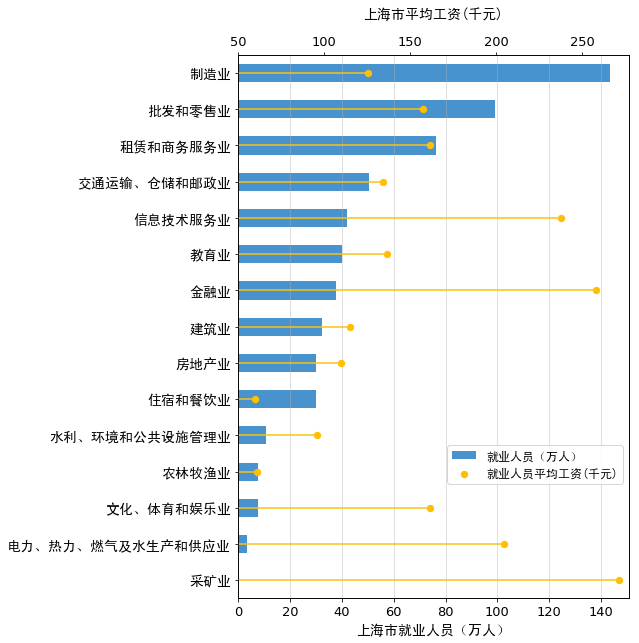

In [16]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(7, 10))
width = 0.5

barh1 = axarr.barh(np.arange(len(domain_sh_19_df)),
                   domain_sh_19_df['2019年_population'],
                   color='#4893cd', height=width)

axarr.tick_params(labelsize=13)
axarr.set_xlabel('上海市就业人员（万人）', size=13, fontproperties=fontP)
axarr.set_yticks(domain_sh_19_df.index)
axarr.set_yticklabels(domain_sh_19_df['行业'], fontproperties=fontP)
axarr.set_ylim(-0.5, 14.5)
axarr.grid(which='major', axis='x', alpha=0.5)

ax_02 = axarr.twiny()
ax_02.hlines(y=np.arange(len(domain_sh_19_df)),
             xmin=40000, xmax=domain_sh_19_df['2019年_salary'],
             color='#fcc115')
scatter1 = ax_02.scatter(x=domain_sh_19_df['2019年_salary'],
                         y=np.arange(len(domain_sh_19_df)),
                         s=40,
                         marker='o',
                         color='#FFBF00')
ax_02.tick_params(labelsize=13)
ax_02.set_xlim(50000, 277000)
ax_02.set_xlabel('上海市平均工资(千元)', size=13, labelpad=17, fontproperties=fontP)
ax_02.xaxis.set_major_formatter(formatter_thousands)

ax_02.legend(handles=(barh1, scatter1),
             labels=('就业人员（万人）', '就业人员平均工资(千元)'),
             bbox_to_anchor=(1, 0.2),
             loc=4, prop=fontP_12)



### Xizang

In [59]:
emplNb_dom_xz_df = emplNb_province_df[
    emplNb_province_df['地区'] == '西藏自治区'].sort_values('2019年').reset_index(drop=True)

domain_xz_19_df = emplNb_dom_xz_df.merge(
    salary_province_df[salary_province_df['地区'] == '西藏自治区'][['地区', '行业', '2019年']],
    on=['地区', '行业'], suffixes=('_population', '_salary'))

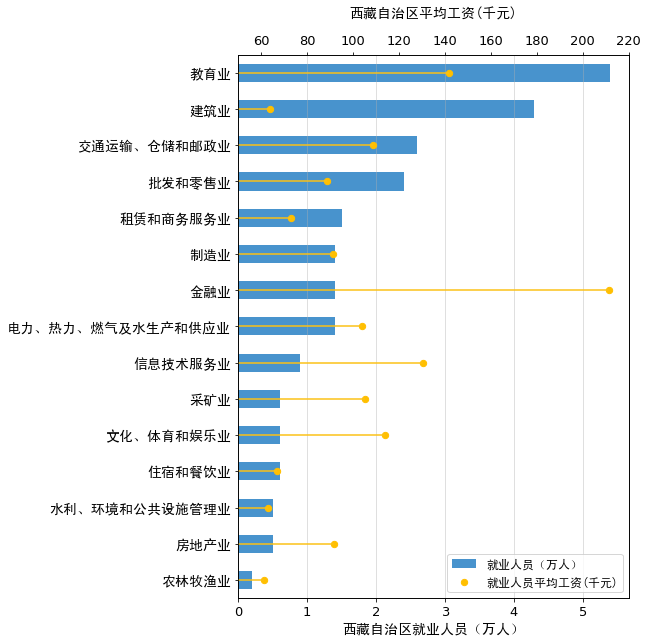

In [64]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(7, 10))
width = 0.5

barh1 = axarr.barh(np.arange(len(domain_xz_19_df)),
                   domain_xz_19_df['2019年_population'],
                   color='#4893cd', height=width)

axarr.tick_params(labelsize=13)
axarr.set_xlabel('西藏自治区就业人员（万人）', size=13, fontproperties=fontP)
axarr.set_yticks(domain_xz_19_df.index)
axarr.set_yticklabels(domain_xz_19_df['行业'], fontproperties=fontP)
axarr.set_ylim(-0.5, 14.5)
axarr.grid(which='major', axis='x', alpha=0.5)

ax_02 = axarr.twiny()
ax_02.hlines(y=np.arange(len(domain_xz_19_df)),
             xmin=40000, xmax=domain_xz_19_df['2019年_salary'],
             color='#fcc115')
scatter1 = ax_02.scatter(x=domain_xz_19_df['2019年_salary'],
                         y=np.arange(len(domain_xz_19_df)),
                         s=40,
                         marker='o',
                         color='#FFBF00')
ax_02.tick_params(labelsize=13)
ax_02.set_xlim(50000, 220000)
ax_02.set_xlabel('西藏自治区平均工资(千元)', size=13, labelpad=17, fontproperties=fontP)
ax_02.xaxis.set_major_formatter(formatter_thousands)

ax_02.legend(handles=(barh1, scatter1),
             labels=('就业人员（万人）', '就业人员平均工资(千元)'),
             loc=4, prop=fontP_12)



西藏的工资水平高，跟其地理环境和产业结构息息相关。西藏因为高海拔，地广人稀，农作物种植基础差，生态脆弱，一二产业整体比较薄弱。根据2017年西藏年报，第一、二、三产业增加值所占比重分别为9.4%、39.2%、51.4%。虽然第三产业是支柱，但不同于北上广深等发达地区，其产业布局，是建立在一、二资源和环境禀赋先天受限的基础上的，并不是产业和经济结构自然进化成熟的结果。所以，虽然工资比肩北京、上海，但从各行业平均工资的分布来看，西藏是另一番景象.

从全国来看，2019年工资水平最高的三个行业，分别是金融业、信息技术服务业（IT行业）、科学研究、技术服务和地质勘查业，平均工资分别为，121909元、120505元和112656元。再看西藏。金融业也是遥遥领先的高薪行业，平均工资达到211502元。但是排第二的是教育业，平均工资141847元；排第三的是信息技术服务业，130430元。西藏前三的高薪行业，相差巨大，金融业平均工资遥遥领先，直逼北京和上海，远远高于国内其他省份。不像全国那样，排在前列的金融与IT行业，平均工资互相追赶，差距很小。

### Guangdong

In [17]:
emplNb_dom_gd_df = emplNb_province_df[
    emplNb_province_df['地区'] == '广东省'].sort_values('2019年').reset_index(drop=True)

domain_gd_19_df = emplNb_dom_gd_df.merge(
    salary_province_df[salary_province_df['地区'] == '广东省'][['地区', '行业', '2019年']],
    on=['地区', '行业'], suffixes=('_population', '_salary'))

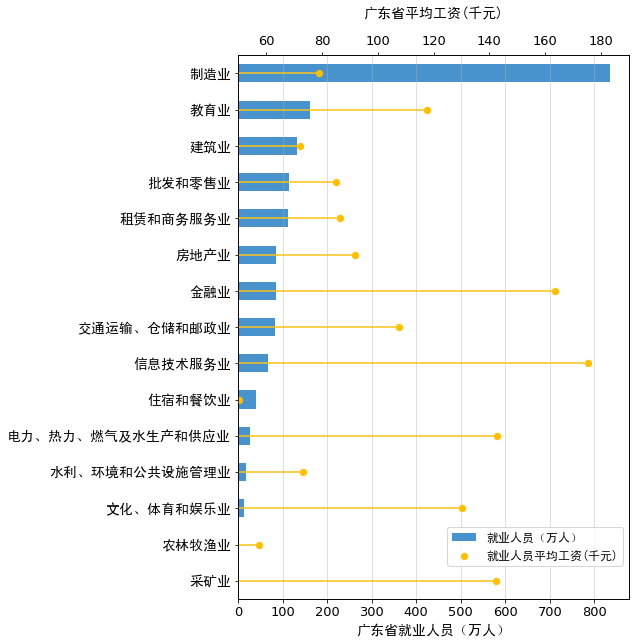

In [18]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(7, 10))
width = 0.5

barh1 = axarr.barh(np.arange(len(domain_gd_19_df)),
                   domain_gd_19_df['2019年_population'],
                   color='#4893cd', height=width)

axarr.tick_params(labelsize=13)
axarr.set_xlabel('广东省就业人员（万人）', size=13, fontproperties=fontP)
axarr.set_yticks(domain_gd_19_df.index)
axarr.set_yticklabels(domain_gd_19_df['行业'], fontproperties=fontP)
axarr.set_ylim(-0.5, 14.5)
axarr.grid(which='major', axis='x', alpha=0.5)

ax_02 = axarr.twiny()
ax_02.hlines(y=np.arange(len(domain_gd_19_df)),
             xmin=40000, xmax=domain_gd_19_df['2019年_salary'],
             color='#fcc115')
scatter1 = ax_02.scatter(x=domain_gd_19_df['2019年_salary'],
                         y=np.arange(len(domain_gd_19_df)),
                         s=40,
                         marker='o',
                         color='#FFBF00')
ax_02.tick_params(labelsize=13)
ax_02.set_xlim(50000, 190000)
ax_02.set_xlabel('广东省平均工资(千元)', size=13, labelpad=17, fontproperties=fontP)
ax_02.xaxis.set_major_formatter(formatter_thousands)

ax_02.legend(handles=(barh1, scatter1),
             labels=('就业人员（万人）', '就业人员平均工资(千元)'),
             bbox_to_anchor=(1, 0.05),
             loc=4, prop=fontP_12)



### Zhejiang

In [19]:
emplNb_dom_zj_df = emplNb_province_df[
    emplNb_province_df['地区'] == '浙江省'].sort_values('2019年').reset_index(drop=True)

domain_zj_19_df = emplNb_dom_zj_df.merge(
    salary_province_df[salary_province_df['地区'] == '浙江省'][['地区', '行业', '2019年']],
    on=['地区', '行业'], suffixes=('_population', '_salary'))

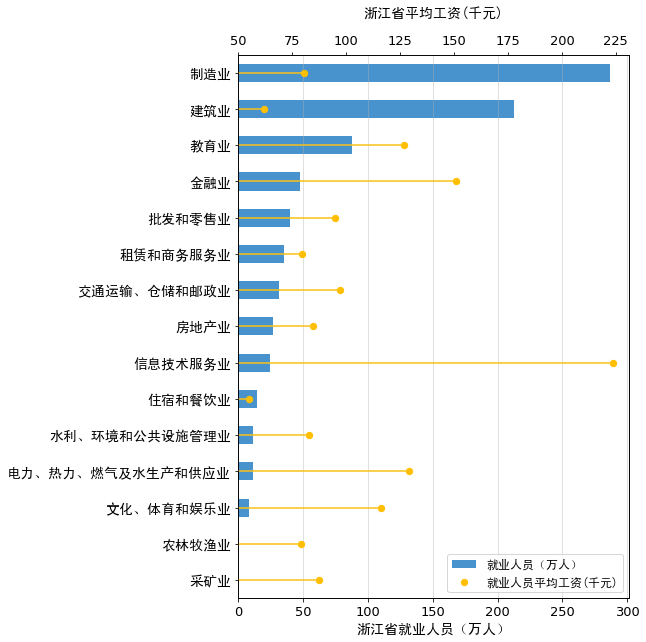

In [20]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(7, 10))
width = 0.5

barh1 = axarr.barh(np.arange(len(domain_zj_19_df)),
                   domain_zj_19_df['2019年_population'],
                   color='#4893cd', height=width)

axarr.tick_params(labelsize=13)
axarr.set_xlabel('浙江省就业人员（万人）', size=13, fontproperties=fontP)
axarr.set_yticks(domain_zj_19_df.index)
axarr.set_yticklabels(domain_zj_19_df['行业'], fontproperties=fontP)
axarr.set_ylim(-0.5, 14.5)
axarr.grid(which='major', axis='x', alpha=0.5)

ax_02 = axarr.twiny()
ax_02.hlines(y=np.arange(len(domain_zj_19_df)),
             xmin=40000, xmax=domain_zj_19_df['2019年_salary'],
             color='#fcc115')
scatter1 = ax_02.scatter(x=domain_zj_19_df['2019年_salary'],
                         y=np.arange(len(domain_zj_19_df)),
                         s=40,
                         marker='o',
                         color='#FFBF00')
ax_02.tick_params(labelsize=13)
ax_02.set_xlim(50000, 231000)
ax_02.set_xlabel('浙江省平均工资(千元)', size=13, labelpad=17, fontproperties=fontP)
ax_02.xaxis.set_major_formatter(formatter_thousands)

ax_02.legend(handles=(barh1, scatter1),
             labels=('就业人员（万人）', '就业人员平均工资(千元)'),
             loc=4, prop=fontP_12)



## Employee number per domain

In [21]:
emplNb_domain_df = emplNb_province_df.groupby(['行业'])[
    '2008年', '2009年', '2010年', '2011年', '2012年', '2013年',
    '2014年', '2015年', '2016年', '2017年', '2018年', '2019年'].sum().T.reset_index()
emplNb_domain_df['index'] = emplNb_domain_df['index'].apply(lambda x: x.split('年')[0])
emplNb_domain_df = emplNb_domain_df.rename(columns = {'index':'year'})

<ipython-input-21-24979e59fc70>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  emplNb_domain_df = emplNb_province_df.groupby(['行业'])[


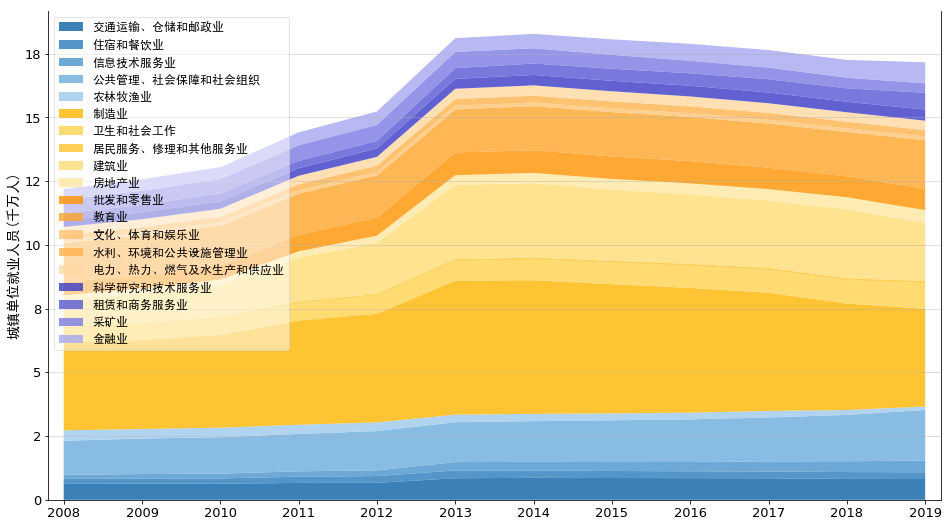

In [22]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

axarr.stackplot(emplNb_domain_df.year,
                [emplNb_domain_df['交通运输、仓储和邮政业'],
                 emplNb_domain_df['住宿和餐饮业'],
                 emplNb_domain_df['信息技术服务业'],
                 emplNb_domain_df['公共管理、社会保障和社会组织'],
                 emplNb_domain_df['农林牧渔业'],
                 emplNb_domain_df['制造业'],
                 emplNb_domain_df['卫生和社会工作'],
                 emplNb_domain_df['居民服务、修理和其他服务业'],
                 emplNb_domain_df['建筑业'],
                 emplNb_domain_df['房地产业'],
                 emplNb_domain_df['批发和零售业'],
                 emplNb_domain_df['教育业'],
                 emplNb_domain_df['文化、体育和娱乐业'],
                 emplNb_domain_df['水利、环境和公共设施管理业'],
                 emplNb_domain_df['电力、热力、燃气及水生产和供应业'],
                 emplNb_domain_df['科学研究和技术服务业'],
                 emplNb_domain_df['租赁和商务服务业'],
                 emplNb_domain_df['采矿业'],
                 emplNb_domain_df['金融业']
                ],
                labels=['交通运输、仓储和邮政业',
                        '住宿和餐饮业',
                        '信息技术服务业',
                        '公共管理、社会保障和社会组织',
                        '农林牧渔业',
                        '制造业',
                        '卫生和社会工作',
                        '居民服务、修理和其他服务业',
                        '建筑业',
                        '房地产业',
                        '批发和零售业',
                        '教育业',
                        '文化、体育和娱乐业',
                        '水利、环境和公共设施管理业',
                        '电力、热力、燃气及水生产和供应业',
                        '科学研究和技术服务业',
                        '租赁和商务服务业',
                        '采矿业',
                        '金融业'
                       ],
                colors = ['#0A62A5', '#297CBC', '#4893CD', '#6CACDD', '#9DCAED',
                          '#FFB600', '#FFD34E', '#FFC52A', '#FFDC74', '#FFE8A2',
                          '#FF9200', '#FFA42A', '#FFC374', '#FFB34E', '#FFD7A2',
                          '#3A3AC7', '#5757D5', '#7979E3', '#A6A6F0'
                         ],
                alpha=0.8)

axarr.tick_params(labelsize=13)
axarr.set_xlim(-0.2, 11.2)
axarr.spines['top'].set_visible(False)
axarr.set_ylabel('城镇单位就业人员(千万人)', size=13, fontproperties=fontP)
axarr.yaxis.set_major_formatter(formatter_thousands)

axarr.grid(which='major', axis='y', alpha=0.5)
axarr.legend(ncol=1, framealpha=0.5,
             loc=2, prop=fontP_12)

## Employee salary per domain

In [23]:
salary_domain_df = salary_province_df.groupby(['行业'])[
    '2006年', '2007年', '2008年', '2009年', '2010年', '2011年', '2012年', '2013年',
    '2014年', '2015年', '2016年', '2017年', '2018年', '2019年'].mean().sort_values(
    '2019年').T.reset_index()
salary_domain_df['index'] = salary_domain_df['index'].apply(lambda x: x.split('年')[0])
salary_domain_df = salary_domain_df.rename(columns = {'index':'year'})

<ipython-input-23-d1c2b4bce35d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  salary_domain_df = salary_province_df.groupby(['行业'])[


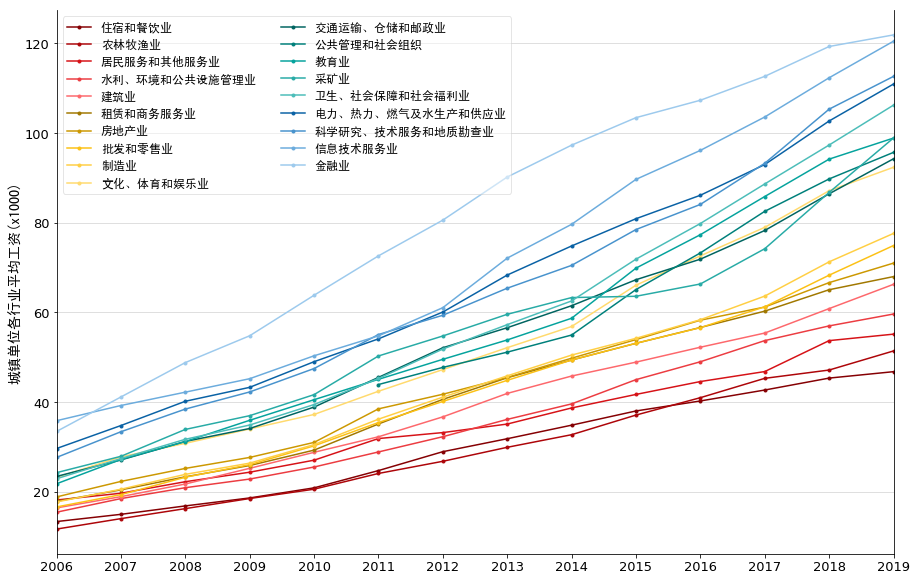

In [24]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
width = 5

color_list = ['#850003', '#AD0509', '#D61217', '#EC3C41', '#FD686C',
              '#A17800', '#CC9801', '#FCC115', '#FFCF44', '#FFDA6E',
              '#006460', '#00807B', '#05A39D', '#28ABA6', '#4CBDB9',
              '#0A62A5', '#4893CD', '#6CACDD', '#9DCAED'
             ]

nbcol = salary_domain_df.shape[1]
for i in range(1, nbcol):
    axarr.plot(salary_domain_df['year'],
               salary_domain_df[salary_domain_df.columns[i]],
               color=color_list[i-1],
               linewidth=1.5,
               marker='.'
              )

axarr.tick_params(labelsize=13)
axarr.set_xlim(0, 13)
axarr.spines['top'].set_visible(False)
axarr.set_ylabel('城镇单位各行业平均工资(x1000)', size=13, fontproperties=fontP)
axarr.yaxis.set_major_formatter(formatter_thousands)

axarr.grid(which='major', axis='y', alpha=0.5)
axarr.legend(ncol=2,
             framealpha=0.5,
             loc=2, prop=fontP_12)


## Employee number and salary per province for some domains in 2019

### IT

In [25]:
emplNb_province_it_19 = emplNb_province_df[
    emplNb_province_df['行业'] == '信息技术服务业'].sort_values('2019年').reset_index(drop=True)

province_it_19_df = emplNb_province_it_19.merge(
    salary_province_df[salary_province_df['行业'] == '信息技术服务业'][['地区', '行业', '2019年']],
    on=['地区', '行业'], suffixes=('_population', '_salary'))

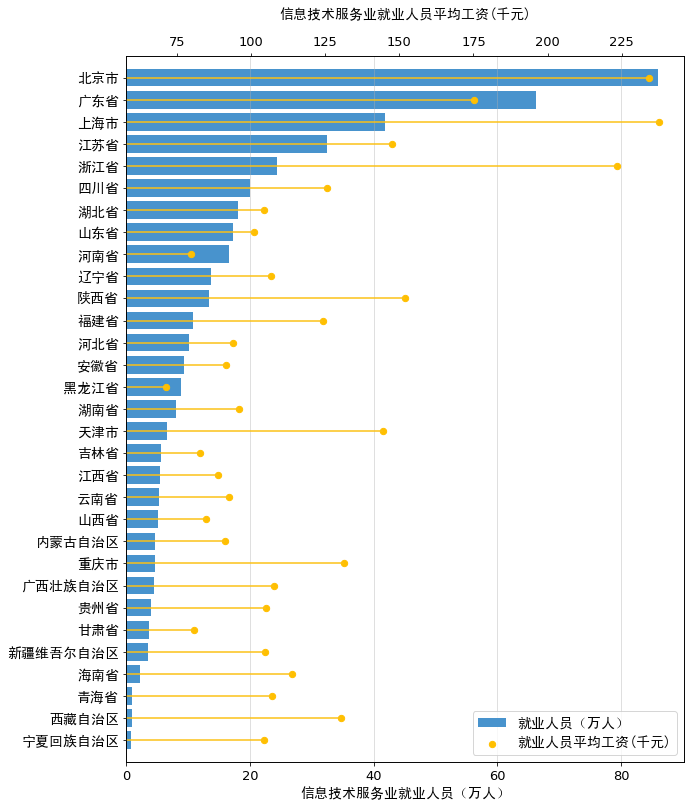

In [26]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(10, 13))
width = 0.5

barh1 = axarr.barh(np.arange(len(province_it_19_df)),
                   province_it_19_df['2019年_population'],
                   color='#4893cd')

axarr.tick_params(labelsize=13)
axarr.set_xlabel('信息技术服务业就业人员（万人）', size=13, fontproperties=fontP)
axarr.set_yticks(emplNb_province_it_19.index)
axarr.set_yticklabels(emplNb_province_it_19['地区'], fontproperties=fontP)
axarr.set_ylim(-1, 31)
axarr.grid(which='major', axis='x', alpha=0.5)

ax_02 = axarr.twiny()
ax_02.hlines(y=np.arange(len(province_it_19_df)),
             xmin=55000, xmax=province_it_19_df['2019年_salary'],
             color='#fcc115')
scatter1 = ax_02.scatter(x=province_it_19_df['2019年_salary'],
                         y=np.arange(len(province_it_19_df)),
                         s=40,
                         marker='o',
                         color='#FFBF00')
ax_02.tick_params(labelsize=13)
ax_02.set_xlim(58000, 246000)
ax_02.set_xlabel('信息技术服务业就业人员平均工资(千元)', size=13, labelpad=17, fontproperties=fontP)
ax_02.xaxis.set_major_formatter(formatter_thousands)

ax_02.legend(handles=(barh1, scatter1),
             fontsize=13,
             labels=('就业人员（万人）', '就业人员平均工资(千元)'),
             loc=4, prop=fontP)



### Finance

In [27]:
emplNb_province_finance_19 = emplNb_province_df[
    emplNb_province_df['行业'] == '金融业'].sort_values('2019年').reset_index(drop=True)
province_finance_19_df = emplNb_province_finance_19.merge(
    salary_province_df[salary_province_df['行业'] == '金融业'][['地区', '行业', '2019年']],
    on=['地区', '行业'], suffixes=('_population', '_salary'))

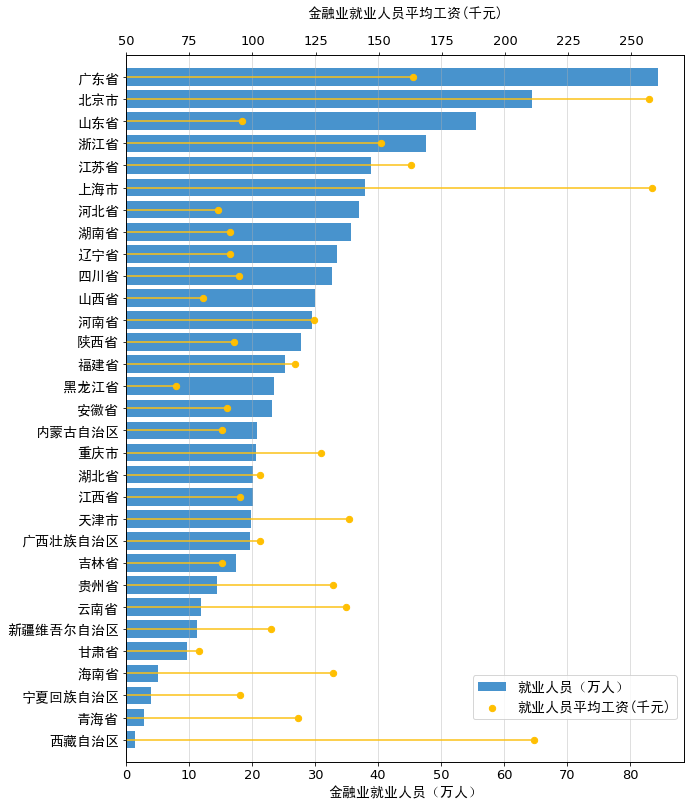

In [28]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(10, 13))
width = 0.5

barh1 = axarr.barh(np.arange(len(province_finance_19_df)),
                   province_finance_19_df['2019年_population'],
                   color='#4893cd')

axarr.tick_params(labelsize=13)
axarr.set_xlabel('金融业就业人员（万人）', size=13, fontproperties=fontP)
axarr.set_yticks(province_finance_19_df.index)
axarr.set_yticklabels(province_finance_19_df['地区'], fontproperties=fontP)
axarr.set_ylim(-1, 31)
axarr.grid(which='major', axis='x', alpha=0.5)

ax_02 = axarr.twiny()
ax_02.hlines(y=np.arange(len(province_finance_19_df)),
             xmin=50000, xmax=province_finance_19_df['2019年_salary'],
             color='#fcc115')
scatter1 = ax_02.scatter(x=province_finance_19_df['2019年_salary'],
                         y=np.arange(len(province_finance_19_df)),
                         s=40,
                         marker='o',
                         color='#FFBF00')
ax_02.tick_params(labelsize=13)
ax_02.set_xlim(50000, 271000)
ax_02.set_xlabel('金融业就业人员平均工资(千元)', size=13, labelpad=17, fontproperties=fontP)
ax_02.xaxis.set_major_formatter(formatter_thousands)

ax_02.legend(handles=(barh1, scatter1),
             fontsize=13,
             labels=('就业人员（万人）', '就业人员平均工资(千元)'),
             bbox_to_anchor=(1, 0.05),
             loc=4, prop=fontP)



### 电力、热力、燃气及水生产和供应业

In [29]:
emplNb_province_drr_19 = emplNb_province_df[
    emplNb_province_df['行业'] == '电力、热力、燃气及水生产和供应业'].sort_values('2019年').reset_index(drop=True)
province_drr_19_df = emplNb_province_drr_19.merge(
    salary_province_df[salary_province_df['行业'] == '电力、热力、燃气及水生产和供应业'][['地区', '行业', '2019年']],
    on=['地区', '行业'], suffixes=('_population', '_salary'))

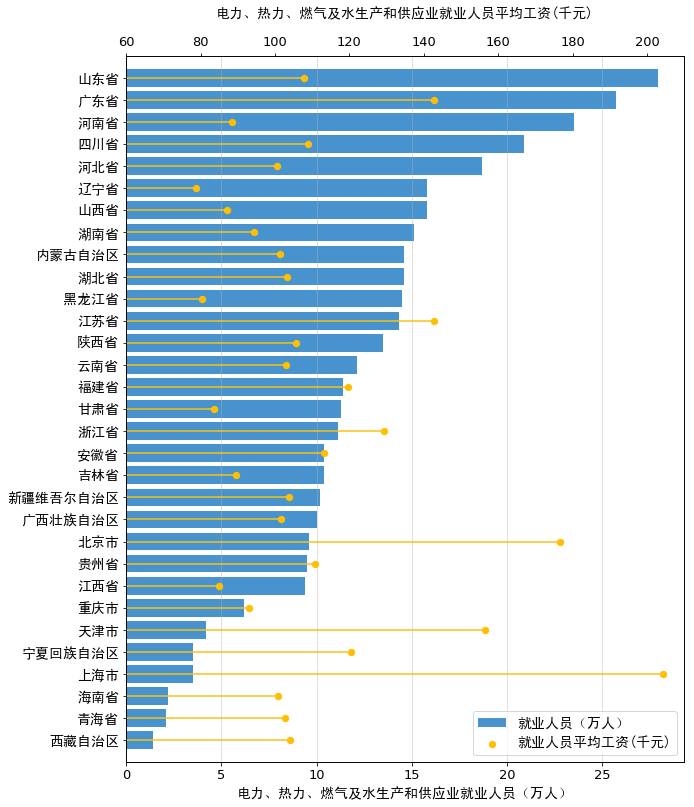

In [30]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(10, 13))
width = 0.5

barh1 = axarr.barh(np.arange(len(province_drr_19_df)),
                   province_drr_19_df['2019年_population'],
                   color='#4893cd')

axarr.tick_params(labelsize=13)
axarr.set_xlabel('电力、热力、燃气及水生产和供应业就业人员（万人）', size=13, fontproperties=fontP)
axarr.set_yticks(province_drr_19_df.index)
axarr.set_yticklabels(province_drr_19_df['地区'], fontproperties=fontP)
axarr.set_ylim(-1, 31)
axarr.grid(which='major', axis='x', alpha=0.5)

ax_02 = axarr.twiny()
ax_02.hlines(y=np.arange(len(province_drr_19_df)),
             xmin=50000, xmax=province_drr_19_df['2019年_salary'],
             color='#fcc115')
scatter1 = ax_02.scatter(x=province_drr_19_df['2019年_salary'],
                         y=np.arange(len(province_drr_19_df)),
                         s=40,
                         marker='o',
                         color='#FFBF00')
ax_02.tick_params(labelsize=13)
ax_02.set_xlim(60000, 210000)
ax_02.set_xlabel('电力、热力、燃气及水生产和供应业就业人员平均工资(千元)', size=13, labelpad=17, fontproperties=fontP)
ax_02.xaxis.set_major_formatter(formatter_thousands)

ax_02.legend(handles=(barh1, scatter1),
             fontsize=13,
             labels=('就业人员（万人）', '就业人员平均工资(千元)'),
             loc=4, prop=fontP)



### 房地产业

In [31]:
emplNb_province_immo_19 = emplNb_province_df[
    emplNb_province_df['行业'] == '房地产业'].sort_values('2019年').reset_index(drop=True)
province_immo_19_df = emplNb_province_immo_19.merge(
    salary_province_df[salary_province_df['行业'] == '房地产业'][['地区', '行业', '2019年']],
    on=['地区', '行业'], suffixes=('_population', '_salary'))

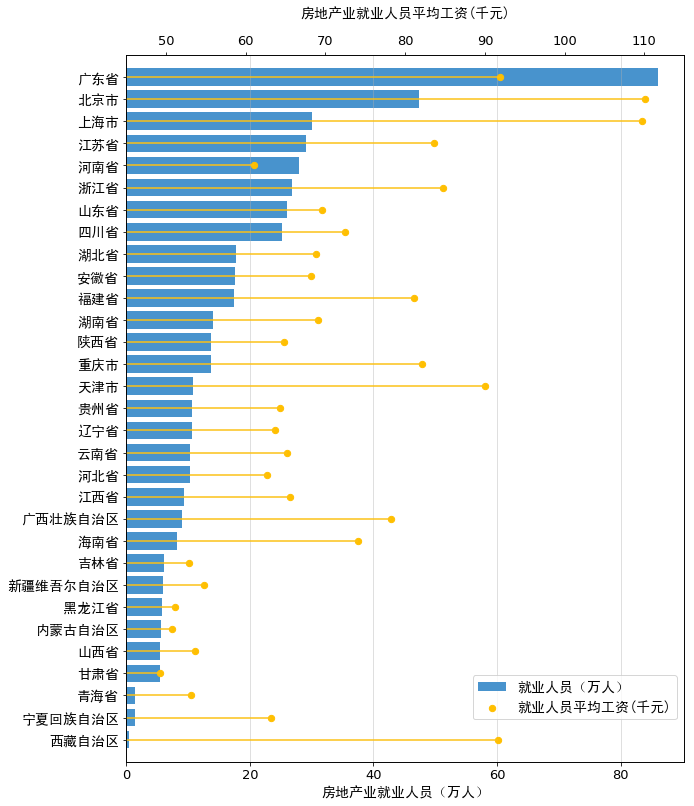

In [32]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(10, 13))
width = 0.5

barh1 = axarr.barh(np.arange(len(province_immo_19_df)),
                   province_immo_19_df['2019年_population'],
                   color='#4893cd')

axarr.tick_params(labelsize=13)
axarr.set_xlabel('房地产业就业人员（万人）', size=13, fontproperties=fontP)
axarr.set_yticks(province_immo_19_df.index)
axarr.set_yticklabels(province_immo_19_df['地区'], fontproperties=fontP)
axarr.set_ylim(-1, 31)
axarr.grid(which='major', axis='x', alpha=0.5)

ax_02 = axarr.twiny()
ax_02.hlines(y=np.arange(len(province_immo_19_df)),
             xmin=10000, xmax=province_immo_19_df['2019年_salary'],
             color='#fcc115')
scatter1 = ax_02.scatter(x=province_immo_19_df['2019年_salary'],
                         y=np.arange(len(province_immo_19_df)),
                         s=40,
                         marker='o',
                         color='#FFBF00')
ax_02.tick_params(labelsize=13)
ax_02.set_xlim(45000, 115000)
ax_02.set_xlabel('房地产业就业人员平均工资(千元)', size=13, labelpad=17, fontproperties=fontP)
ax_02.xaxis.set_major_formatter(formatter_thousands)

ax_02.legend(handles=(barh1, scatter1),
             fontsize=13,
             labels=('就业人员（万人）', '就业人员平均工资(千元)'),
             bbox_to_anchor=(1, 0.05),
             loc=4, prop=fontP)



## Reference

- 林小昭，第一财经，广东流动人口超5200万，深圳十年猛增700多万人 https://www.yicai.com/news/101051457.html
- 吖海说热点，广东，凭什么成为全国最吸引人口的省份，远超江苏？https://www.sohu.com/a/466646223_120131445
- 新华日报，江苏省今年将新增城镇就业120万人 http://www.gov.cn/xinwen/2019-01/05/content_5355108.htm
- 任泽平，新浪财经，从国际经验看北京上海等超大城市人口发展趋势 http://finance.sina.com.cn/zl/china/2021-01-11/zl-iiznctkf1380680.shtml
- 诸葛找房，2019年全国平均工资版图：北京位列第一！https://news.leju.com/2020-07-08/6686423057948786003.shtml
- 西部君，西藏的平均工资，到底高到什么程度 https://zhuanlan.zhihu.com/p/37028885